In [ ]:
# CDS540 Assignment 1
# HUANG Xinghua 3160617

In [3]:
# Install the necessary packges
!pip install opencv-python-headless pytesseract --user

  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [15]:
# Specify the path to tesseract.exe in the pytesseract module
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [16]:
# Import the necessary libraries
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

In [17]:
# Function for Displaying image
def display_image(img, title='Image', cmap_type='gray'):
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

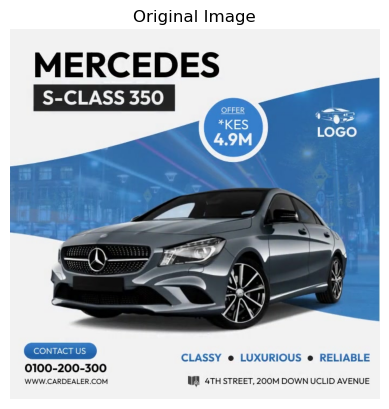

In [25]:
# Load the sample image containing text
image = cv2.imread('C:/Users/26087/Desktop/sample_image1.jpg')
if image is None:
    print("Image not loaded. Check the file path.")
else:
    # Convert the image from BGR to RGB
    display_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'Original Image', cmap_type=None)

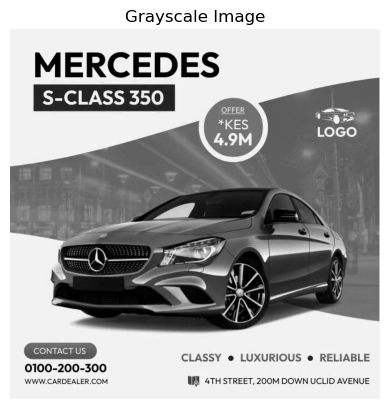

In [26]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image(gray, 'Grayscale Image')

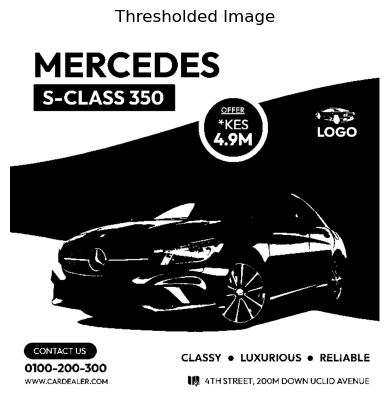

In [27]:
# Apply image processing techniques
# Thresholding
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
display_image(thresh, 'Thresholded Image')

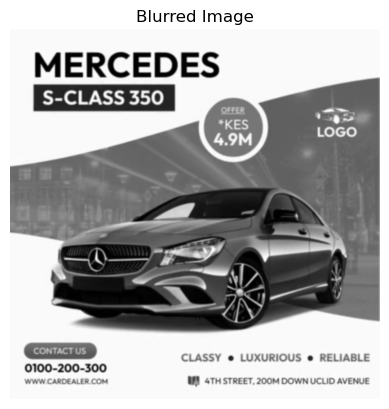

In [28]:
# Blurring
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
display_image(blurred, 'Blurred Image')

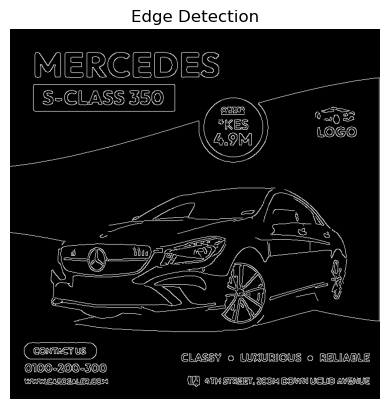

In [29]:
# Canny edge detection
edges = cv2.Canny(blurred, 100, 200)
display_image(edges, 'Edge Detection')

In [30]:
# Extract and display text
# Adding custom options
custom_config = r'--oem 3 --psm 6'
extracted_text = pytesseract.image_to_string(thresh, config=custom_config)
print("Detected Text:\n", extracted_text)

Detected Text:
 S-CLASS 350 —_
*KES
LOGO
s
— 7" _ é
a iS
CLASSY @ LUXURIOUS @ RELIABLE
0100-200-300
WWW.CARDEALER.COM LL] 4TH STREET, 200M DOWN UCLID AVENUE



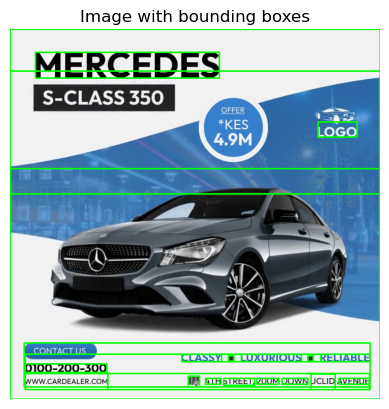

In [31]:
# Display bounding boxes
# Use pytesseract to get the bounding box coordinates of text areas
d = pytesseract.image_to_data(thresh, output_type=pytesseract.Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    # Draw rectangles with green color and 2 px thickness
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

display_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'Image with bounding boxes', cmap_type=None)